# Project 1 - "BO4BT"

## Experimental Series 1 - Poly(Glycerol X) Optimisation - "PGXOpt"

### Part C - Hyperparameter Optimisation Comparison - "HypOptComp"

#### Part C3 - Poly(Glycerol Citrate Itaconate) Sobol Search (Samples=27, Predictors=3, Objectives=1) - "PtC3-PGCI-SobSrch-\[27\]-P3O1"

# Stykke-0: Sampling Procedure

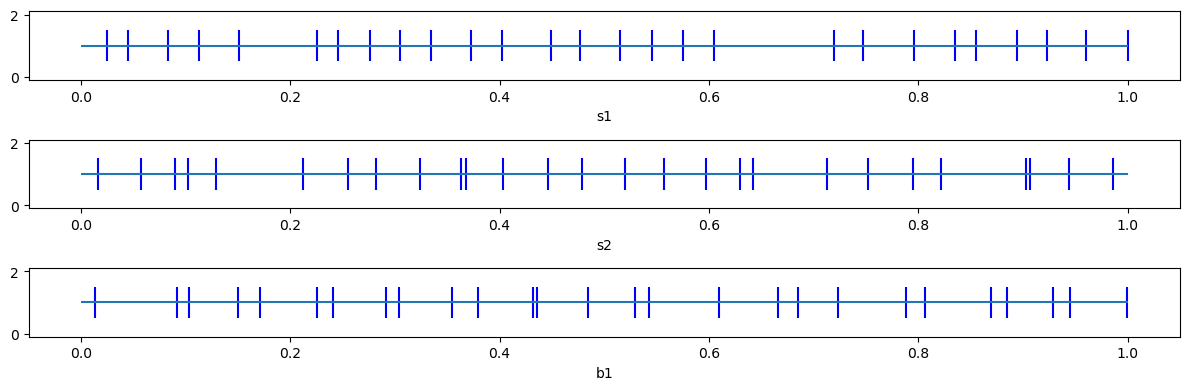

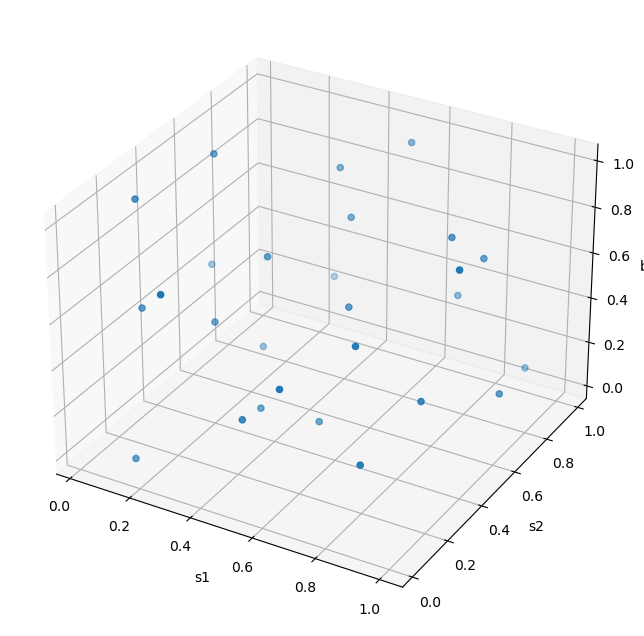

In [4]:
import os
ScriptPath_str = os.getcwd()
os.chdir("/Users/github/BO4BT")
from ExperimentalMethods import ExperimentalMethods
from Miscellaneous import chemical
from Miscellaneous import dimension
from SimplexSampler import SimplexSampler
from StoichiometryConverter import StoichiometryConverter
os.chdir(ScriptPath_str)

# Set the desired number of samples
NoSD_sca = 27
# Instantiate dimension object(s)
s1_obj = dimension(name='s1', low=0, high=1)
s2_obj = dimension(name='s2', low=0, high=1)
x1_obj = dimension(name='x1', low=0, high=1)
# Create a list of dimensional object(s)
dims_lis = [s1_obj,s2_obj,x1_obj]
# Instantiate the simplex sampler class
SpxSplr_obj = SimplexSampler()
# Call the subclass function for
s1_arr,s2_arr,x1_arr,b1_arr = SpxSplr_obj.one.quasirandom(NoSD_sca,dims_lis)
# Creating a list of bayes dimensional arrays
bdims_lis = [s1_arr,s2_arr,b1_arr]
# Plotting
SpxSplr_obj.one.plot(s1_arr,s2_arr,b1_arr)

# Instantiate stoichiometry converter class
StoiConv_obj = StoichiometryConverter()
# Set the chemicals of interest
chemG_obj = chemical(name="Glycerol",abbrev_name="G",mr=92.09,low=1,high=1)
chemCA_obj = chemical(name="Citric Acid",abbrev_name="CA",low=0.5,high=2,mr=192.12)
chemIA_obj = chemical(name="Itaconic Acid",abbrev_name="IA",low=1,high=2,mr=130.12)
chem_lis = [chemG_obj,chemCA_obj,chemIA_obj]
# Generate stoichiometries
Gsr_arr,CAsr_arr,IAsr_arr = StoiConv_obj.threedim.conv(chem_lis,bdims_lis)
sr_lis = [Gsr_arr,CAsr_arr,IAsr_arr]

# Instantiate the experimental methods class
ExptMthd_obj = ExperimentalMethods()
# Setup and build the mould filling sequence list
alpha_lis = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
numeric_lis = ["1","2","3","4","5","6"]
fill_lis = (ExptMthd_obj.setup.moulds(alpha_lis,numeric_lis))[0:NoSD_sca]
# Initialise the file structure for data storage
Csv1Path_str,Csv2Path_str,Csv3Path_str,Csv4Path_str = ExptMthd_obj.setup.initcsv(chem_lis,dims_lis)
CsvPaths_lis = [Csv1Path_str,Csv2Path_str,Csv3Path_str,Csv4Path_str]

# Stykke-1: Sample Preparation

In [5]:
import os
ScriptPath_str = os.getcwd()
os.chdir("/Users/github/BO4BT")
from ExperimentalMethods import ExperimentalMethods
os.chdir(ScriptPath_str)

styk1_obj = ExperimentalMethods.stykke1()
MPs_lis,MoSMs_lis,MoSMPP_lis,MoPP_lis,ToPP_lis = styk1_obj.run(NoSD_sca,fill_lis,sr_lis,chem_lis)
styk1_obj.show(dims_lis,bdims_lis,sr_lis,chem_lis,MPs_lis,MoSMs_lis,MoSMPP_lis,MoPP_lis,ToPP_lis)


Please place command here. (n/b for next/break)
		Input:  n
	What is the mass of Glycerol in the beaker? (x.xx g)
		Input:  3.53
	What is the mass of the silicone mould? (x.xx g)
		Input:  3.22
						Sample A1
					1.0 G + 0.73 CA + 0.53 IA
					3.53g G + 5.34g CA + 2.63g IA

	What is the mass of mould A1 and its prepolymer contents? (x.xx g)
		Input:  6.55

Please place command here. (n/b for next/break)
		Input:  n
	What is the mass of Glycerol in the beaker? (x.xx g)
		Input:  3.53
	What is the mass of the silicone mould? (x.xx g)
		Input:  3.24
						Sample A2
					1.0 G + 0.0 CA + 1.56 IA
					3.53g G + 0.0g CA + 7.76g IA

	What is the mass of mould A2 and its prepolymer contents? (x.xx g)
		Input:  6.68

Please place command here. (n/b for next/break)
		Input:  n
	What is the mass of Glycerol in the beaker? (x.xx g)
		Input:  3.52
	What is the mass of the silicone mould? (x.xx g)
		Input:  3.43
						Sample A3
					1.0 G + 0.94 CA + 0.2 IA
					3.52g G + 6.88g CA + 0.99g IA

	Wh

In [6]:
styk1_obj.save(CsvPaths_lis,MPs_lis,ToPP_lis,chem_lis,dims_lis,bdims_lis,sr_lis,MoSMs_lis,MoSMPP_lis,MoPP_lis)

# Stykke-2: Updating Sample Monitoring Data

In [1]:
import os
ScriptPath_str = os.getcwd()
os.chdir("/Users/github/BO4BT")
from ExperimentalMethods import ExperimentalMethods
from Miscellaneous import chemical
from Miscellaneous import dimension
os.chdir(ScriptPath_str)

s1_obj = dimension(name='s1', low=0, high=1)
s2_obj = dimension(name='s2', low=0, high=1)
x1_obj = dimension(name='x1', low=0, high=1)
dims_lis = [s1_obj,s2_obj,x1_obj]

chemG_obj = chemical(name="Glycerol",abbrev_name="G",mr=92.09,low=1,high=1)
chemCA_obj = chemical(name="Citric Acid",abbrev_name="CA",low=0.5,high=2,mr=192.12)
chemIA_obj = chemical(name="Itaconic Acid",abbrev_name="IA",low=1,high=2,mr=130.12)
chem_lis = [chemG_obj,chemCA_obj,chemIA_obj]

ExptMthd_obj = ExperimentalMethods()

Csv1Path_str,Csv2Path_str,Csv3Path_str,Csv4Path_str = ExptMthd_obj.setup.initcsv(chem_lis,dims_lis)
CsvPaths_lis = [Csv1Path_str,Csv2Path_str,Csv3Path_str,Csv4Path_str]

styk2_obj = ExperimentalMethods.stykke2()
styk2_obj.runsave(CsvPaths_lis)

Mass available for silicone mould A1 and its prepolymer contents? (y/n)
		Input:  y
	What is the current mass of silicone mould A1 and its prepolymer contents? (x.xx g)
		Input:  6.13
Mass available for silicone mould A2 and its prepolymer contents? (y/n)
		Input:  y
	What is the current mass of silicone mould A2 and its prepolymer contents? (x.xx g)
		Input:  6.29
Mass available for silicone mould A3 and its prepolymer contents? (y/n)
		Input:  y
	What is the current mass of silicone mould A3 and its prepolymer contents? (x.xx g)
		Input:  6.58
Mass available for silicone mould A4 and its prepolymer contents? (y/n)
		Input:  y
	What is the current mass of silicone mould A4 and its prepolymer contents? (x.xx g)
		Input:  6.46
Mass available for silicone mould A5 and its prepolymer contents? (y/n)
		Input:  y
	What is the current mass of silicone mould A5 and its prepolymer contents? (x.xx g)
		Input:  6.36
Mass available for silicone mould A6 and its prepolymer contents? (y/n)
		Input:

# Stykke-3: Visualising Sample Monitoring Data

In [5]:
import os
ScriptPath_str = os.getcwd()
os.chdir("/Users/github/BO4BT")
from ExperimentalMethods import ExperimentalMethods
from Miscellaneous import chemical
from Miscellaneous import dimension
os.chdir(ScriptPath_str)

s1_obj = dimension(name='s1', low=0, high=1)
s2_obj = dimension(name='s2', low=0, high=1)
x1_obj = dimension(name='x1', low=0, high=1)
dims_lis = [s1_obj,s2_obj,x1_obj]

chemG_obj = chemical(name="Glycerol",abbrev_name="G",mr=92.09,low=1,high=1)
chemCA_obj = chemical(name="Citric Acid",abbrev_name="CA",low=0.5,high=2,mr=192.12)
chemIA_obj = chemical(name="Itaconic Acid",abbrev_name="IA",low=1,high=2,mr=130.12)
chem_lis = [chemG_obj,chemCA_obj,chemIA_obj]

ExptMthd_obj = ExperimentalMethods()

Csv1Path_str,Csv2Path_str,Csv3Path_str,Csv4Path_str = ExptMthd_obj.setup.initcsv(chem_lis,dims_lis)
CsvPaths_lis = [Csv1Path_str,Csv2Path_str,Csv3Path_str,Csv4Path_str]

styk3_obj = ExperimentalMethods.stykke3()
styk3_obj.runsave(CsvPaths_lis)

/Users/thomasdodd/opt/miniconda3/envs/scikit-optimize_env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/thomasdodd/opt/miniconda3/envs/scikit-optimize_env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/thomasdodd/opt/miniconda3/envs/scikit-optimize_env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/thomasdodd/opt/miniconda3/envs/scikit-optimize_env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covari

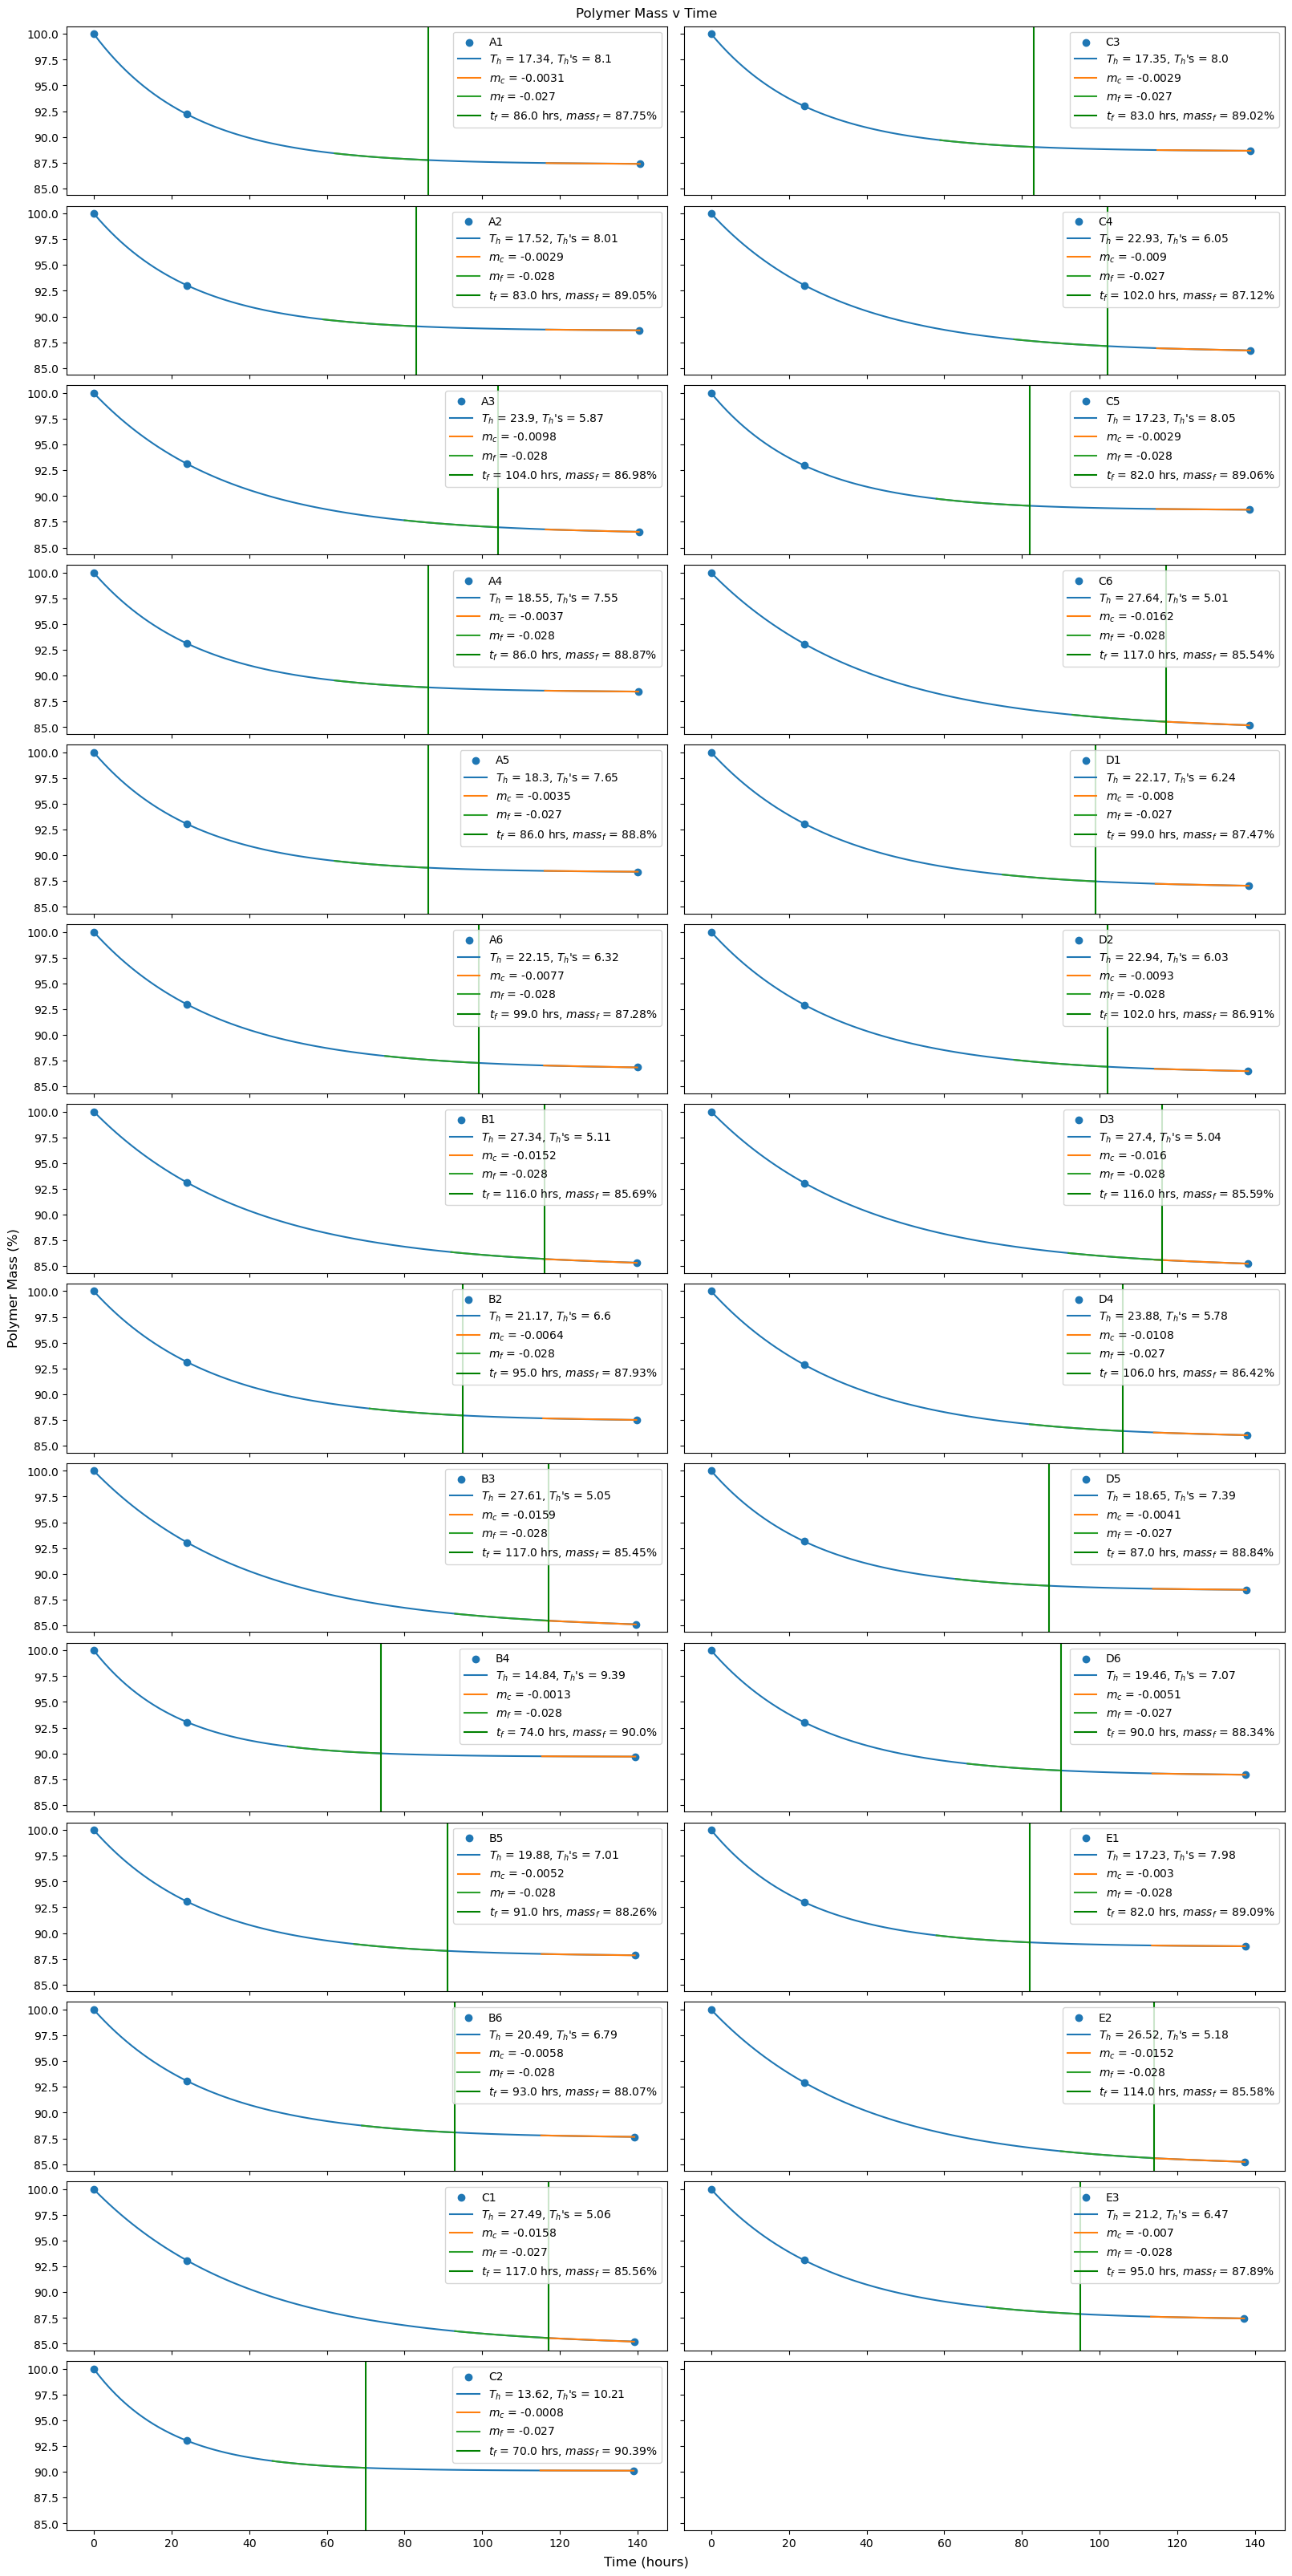

In [7]:
styk3_obj.plotdash(CsvPaths_lis,16,32)

/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/GitHub/BO4BT/ExperimentalMethods.py:648: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alt_df["polymer_mass_%"] = (alt_df["PolymerMass_g"] / __) * 100


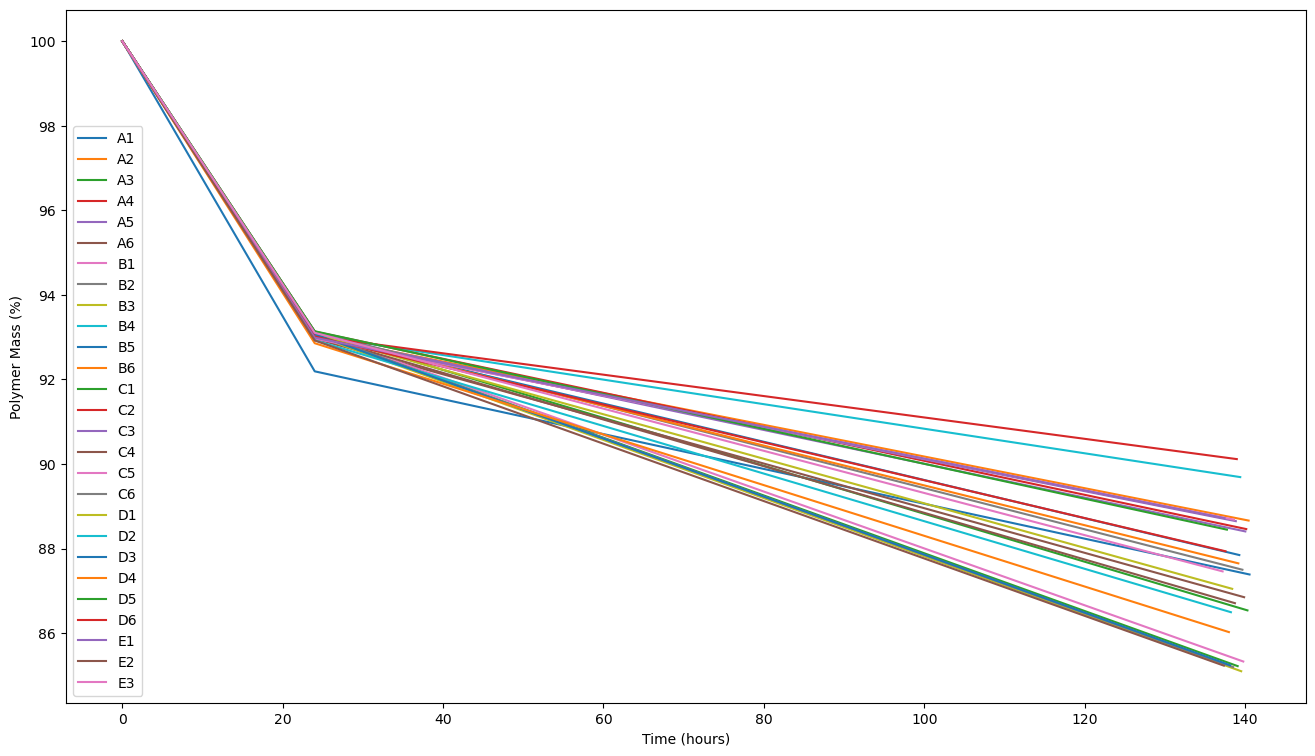

In [4]:
styk3_obj.plotoverview(CsvPaths_lis,16, 9)

# Stykke-4: Stowing Final Dataset

In [1]:
import os
ScriptPath_str = os.getcwd()
os.chdir("/Users/github/BO4BT")
from ExperimentalMethods import ExperimentalMethods
from Miscellaneous import chemical
from Miscellaneous import dimension
os.chdir(ScriptPath_str)

s1_obj = dimension(name='s1', low=0, high=1)
s2_obj = dimension(name='s2', low=0, high=1)
x1_obj = dimension(name='x1', low=0, high=1)
dims_lis = [s1_obj,s2_obj,x1_obj]

chemG_obj = chemical(name="Glycerol",abbrev_name="G",mr=92.09,low=1,high=1)
chemCA_obj = chemical(name="Citric Acid",abbrev_name="CA",low=0.5,high=2,mr=192.12)
chemIA_obj = chemical(name="Itaconic Acid",abbrev_name="IA",low=1,high=2,mr=130.12)
chem_lis = [chemG_obj,chemCA_obj,chemIA_obj]

ExptMthd_obj = ExperimentalMethods()

Csv1Path_str,Csv2Path_str,Csv3Path_str,Csv4Path_str = ExptMthd_obj.setup.initcsv(chem_lis,dims_lis)
CsvPaths_lis = [Csv1Path_str,Csv2Path_str,Csv3Path_str,Csv4Path_str]

styk4_obj = ExperimentalMethods.stykke4()
styk4_obj.runsave(chem_lis,CsvPaths_lis,dims_lis)